In [ ]:
import pandas as pd
data = pd.read_csv('BankChurners.csv').set_index('CLIENTNUM')
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Attrition_Flag                                                                                                                      10127 non-null  object 
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Gender                                                                                                                              10127 non-null  object 
 3   Dependent_count                                                           

In [ ]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
data['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

# Clustering

In [ ]:
data2 = data.copy()
data2 = data2.drop(['Attrition_Flag','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [ ]:
data2.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,
768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data2 = pd.get_dummies(data2)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
kmeans = KMeans(n_clusters=5, random_state = 42)

kmeans.fit(data2)

KMeans(n_clusters=5, random_state=42)

In [ ]:
pred = kmeans.predict(data2)
pred

array([2, 3, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
# prompt: fai fit di un kmeans con 5 cluster su data2 usando uno standard scaler senza usare le pipeline di sklearn

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(data2)

# Transform the data using the fitted scaler
scaled_data = scaler.transform(data2)

# Now, fit the KMeans model on the scaled data
kmeans = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
kmeans.fit(scaled_data)

# Predict cluster labels for your data
pred = kmeans.predict(scaled_data)

# Print or use the predictions as needed
pred

In [ ]:
# prompt: fai fit di un kmeans con 5 cluster su data2 usando uno standard scaler e le pipeline di scikit-learn

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5, n_init = 'auto', random_state=42))
])

pipeline.fit(data2)
pred = pipeline.predict(data2)
pred


array([4, 1, 4, ..., 0, 4, 3], dtype=int32)

In [ ]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [ ]:
pipeline.named_steps['kmeans']

KMeans(n_clusters=5, random_state=42)

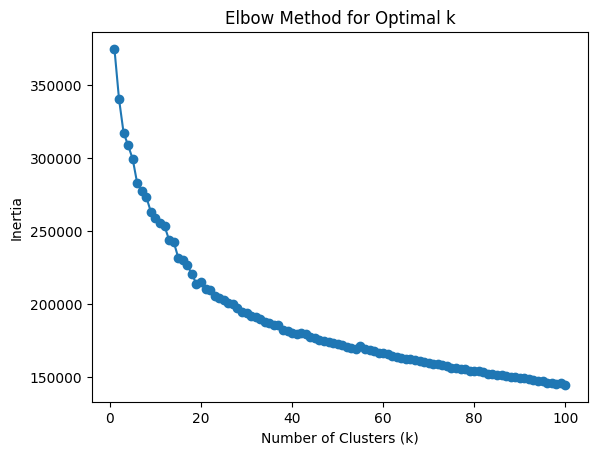

In [ ]:
# prompt: trova il miglior K con metodo elbow

import matplotlib.pyplot as plt

# Calculate inertia for different values of k
inertia = []
k_values = range(1, 101)  # Test k values from 1 to 10

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    pipeline.fit(data2)
    inertia.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the elbow method graph
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Best k based on Silhouette score: 2


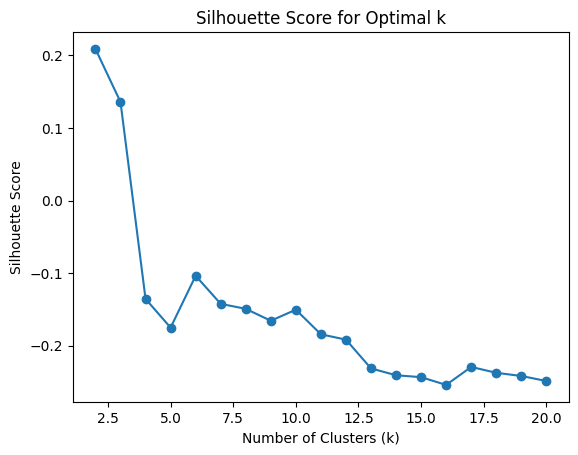

In [ ]:
# prompt: trova il miglior k con silhoutte

from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

# Calculate silhouette scores for different values of k
silhouette_scores = []
k_values = range(2, 21)  # Test k values from 2 to 100 (Silhouette score is not defined for k=1)

pwd = pairwise_distances(data2)

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    pipeline.fit(data2)
    labels = pipeline.predict(data2)
    silhouette_avg = silhouette_score(pwd, labels, metric='precomputed')
    silhouette_scores.append(silhouette_avg)

# Find the best k based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best k based on Silhouette score: {best_k}")

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

Best k based on Silhouette score: 2


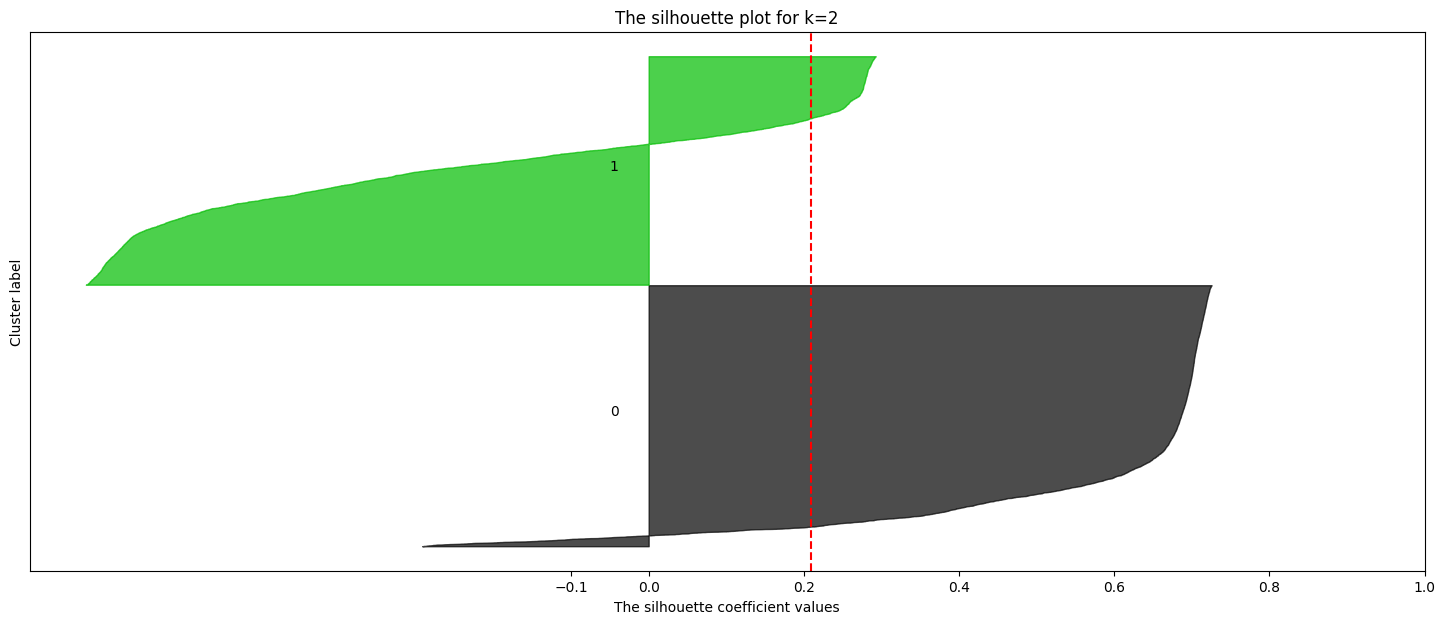

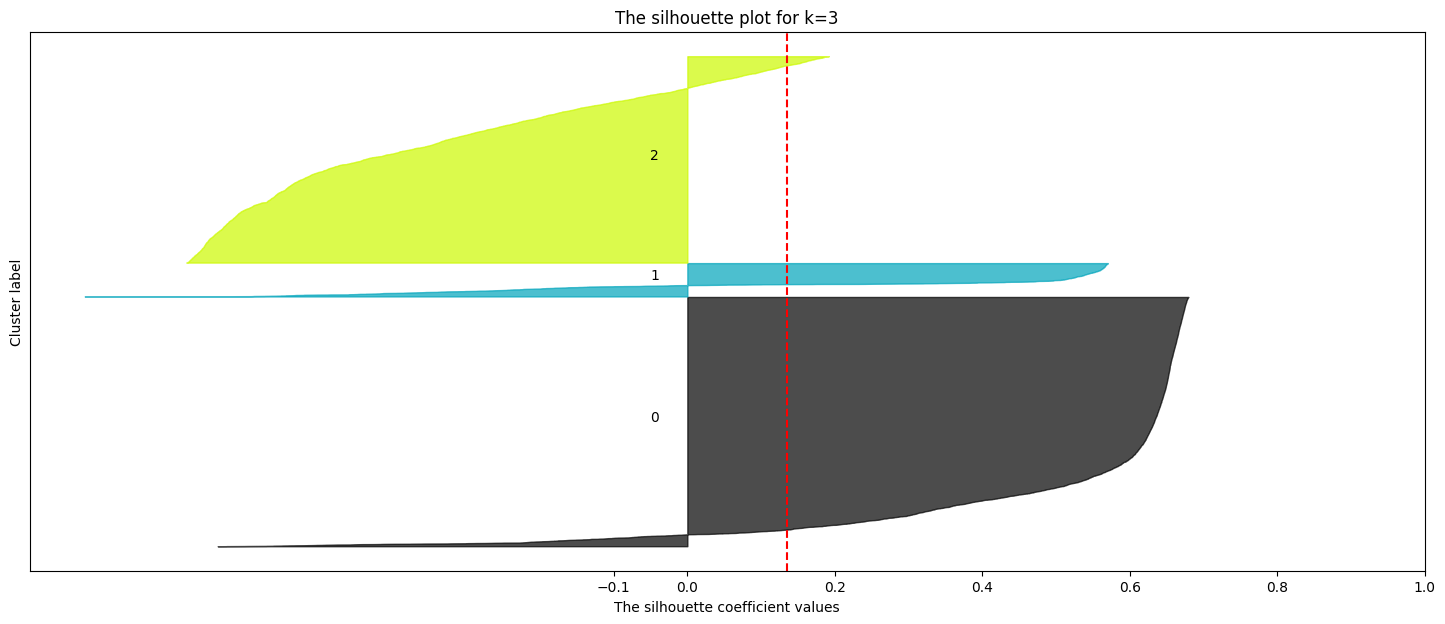

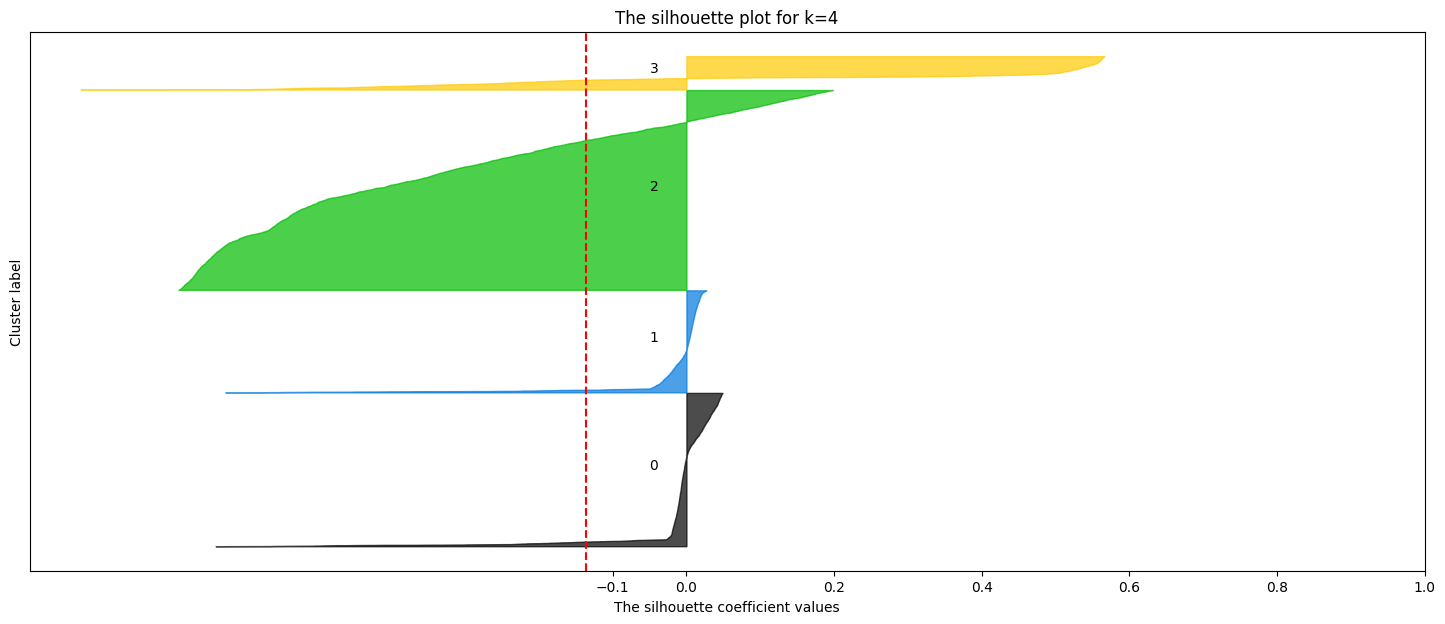

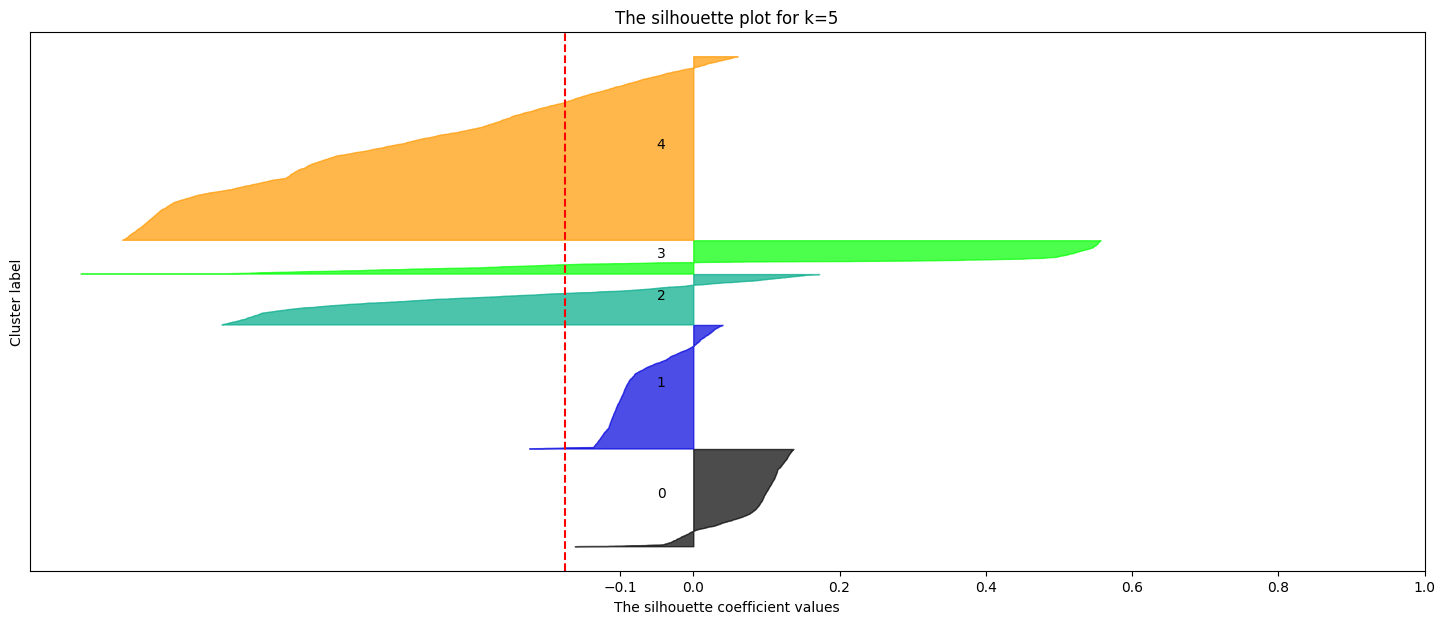

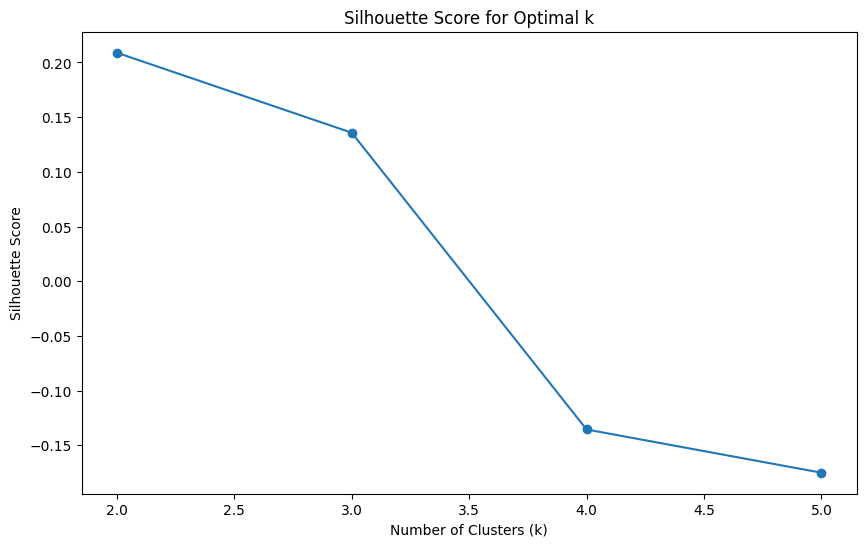

In [ ]:
# prompt: effettua la silhouette analysis per k=range(1,6)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
k_values = range(2, 6)  # Test k values from 2 to 5 (Silhouette score is not defined for k=1)

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, n_init='auto', random_state=42))
    ])
    pipeline.fit(data2)
    cluster_labels = pipeline.predict(data2)
    silhouette_avg = silhouette_score(data2, cluster_labels) # Use data2 directly here
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(data2, cluster_labels)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(data2) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for k={k}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Find the best k based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best k based on Silhouette score: {best_k}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

Best k based on BIC score: 10


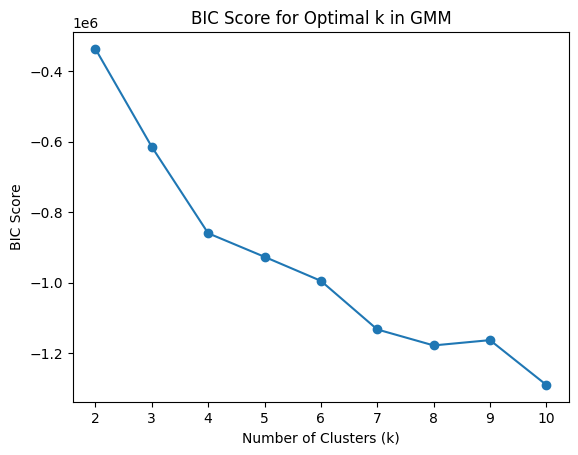

In [ ]:
# prompt: can you find the best k for a GMM with elbow?

from sklearn.mixture import GaussianMixture

# Calculate BIC scores for different values of k
bic_scores = []
k_values = range(2, 11)  # Test k values from 2 to 20

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(scaled_data)  # Use scaled_data here
    bic_scores.append(gmm.bic(scaled_data))

# Find the best k based on the lowest BIC score
best_k = k_values[np.argmin(bic_scores)]
print(f"Best k based on BIC score: {best_k}")

# Plot the BIC scores
plt.plot(k_values, bic_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('BIC Score')
plt.title('BIC Score for Optimal k in GMM')
plt.show()

Best k based on Silhouette score: 2


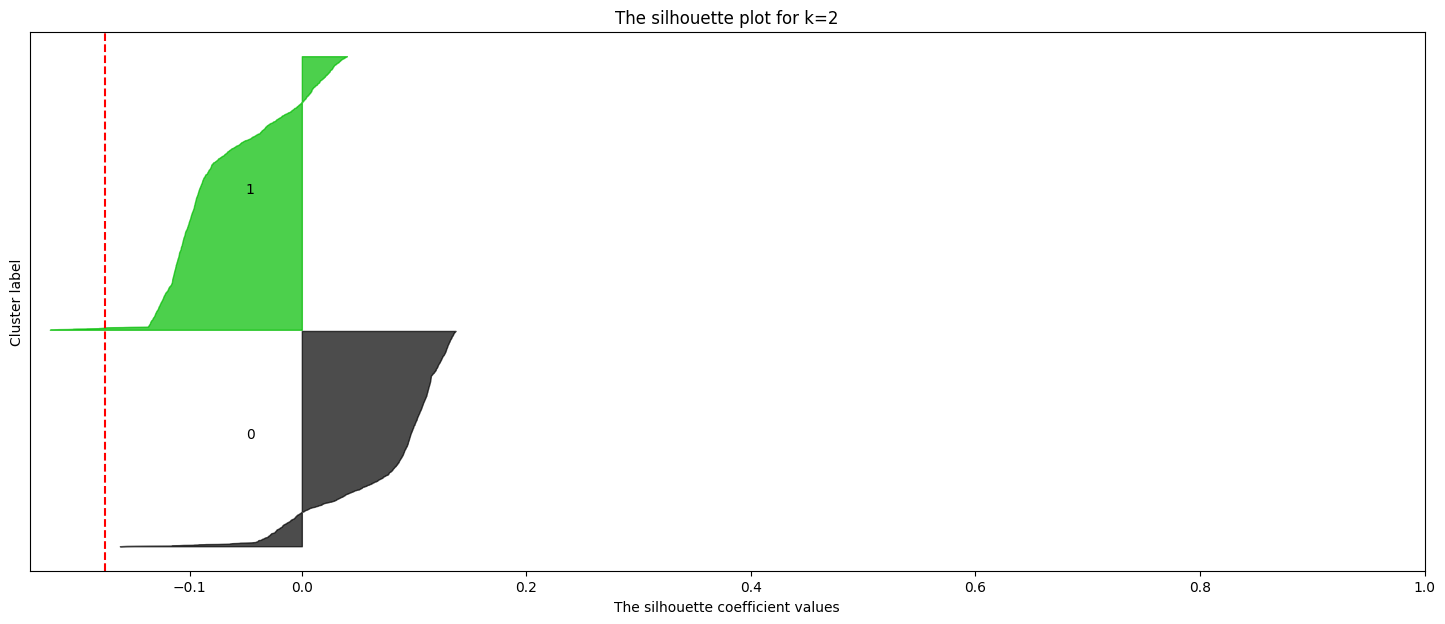

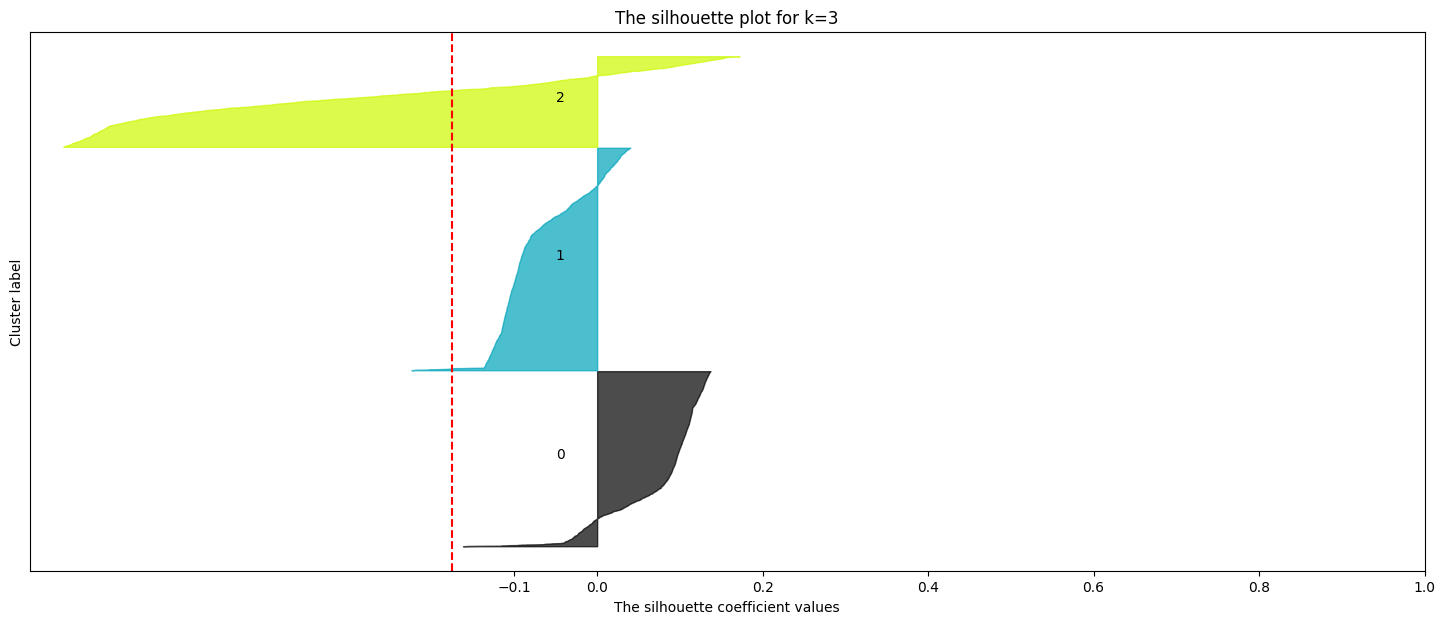

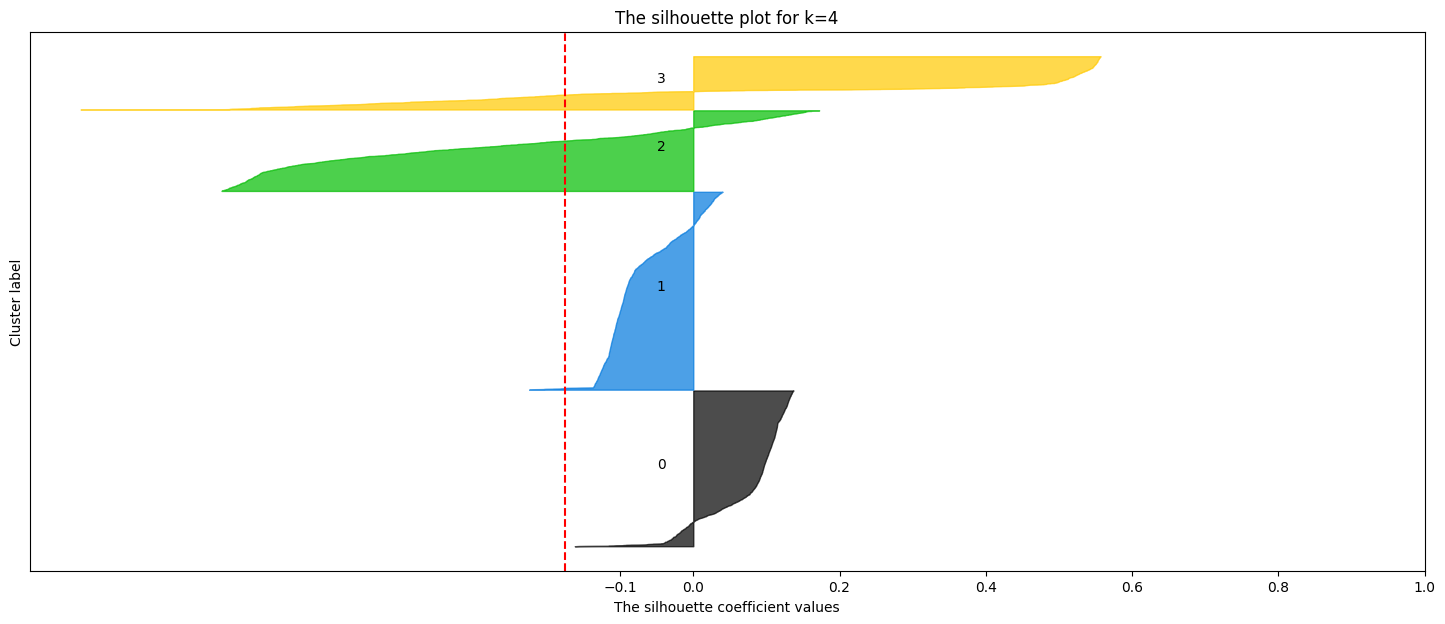

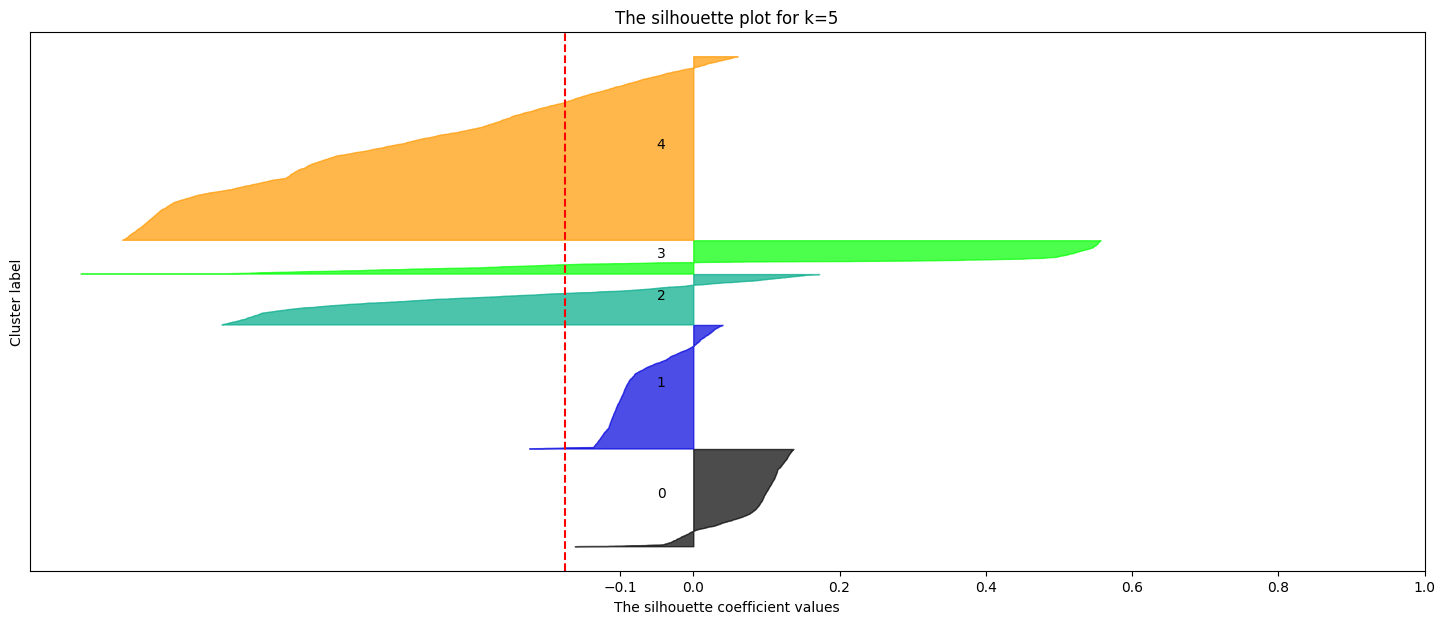

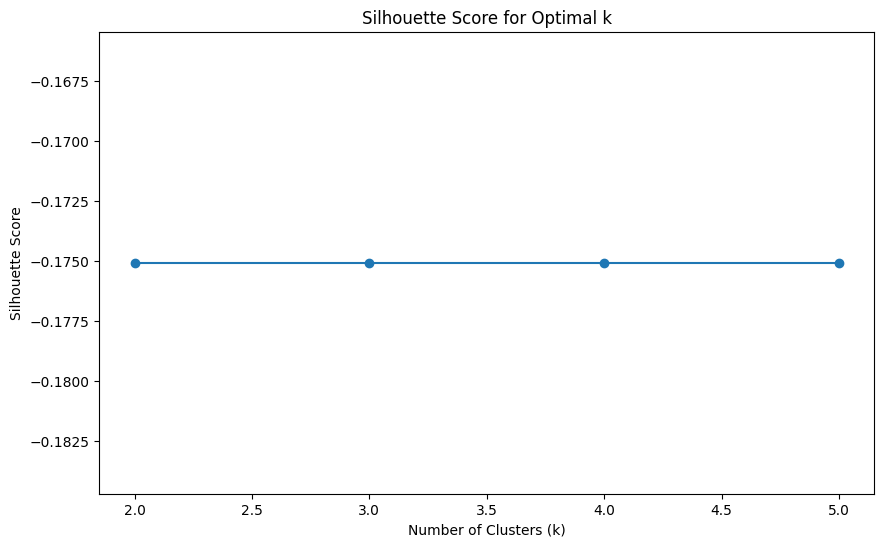

In [ ]:
# prompt: effettua la silhouette analysis per k=range(1,6)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
k_values = range(2, 6)  # Test k values from 2 to 5 (Silhouette score is not defined for k=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(scaled_data)
    cluster_labels = pipeline.gmm(data2)
    silhouette_avg = silhouette_score(data2, cluster_labels) # Use data2 directly here
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(data2, cluster_labels)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(data2) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for k={k}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Find the best k based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best k based on Silhouette score: {best_k}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

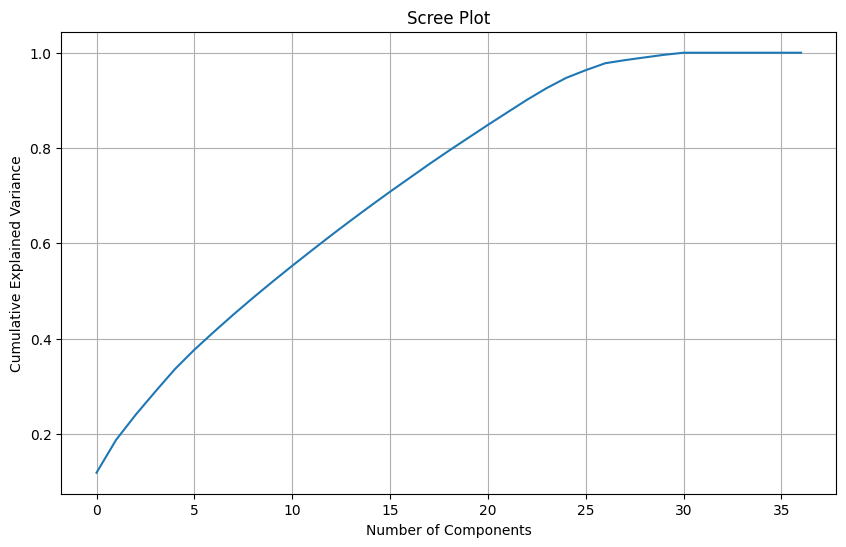

In [ ]:
# prompt: fai pca sul dataset "data2" e mostra uno scree plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is already defined as in your provided code
# ... (your existing code to define data2) ...

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[24]

0.9472334124009314

In [ ]:
pca = PCA(n_components=25)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

Best k based on Silhouette score: 3


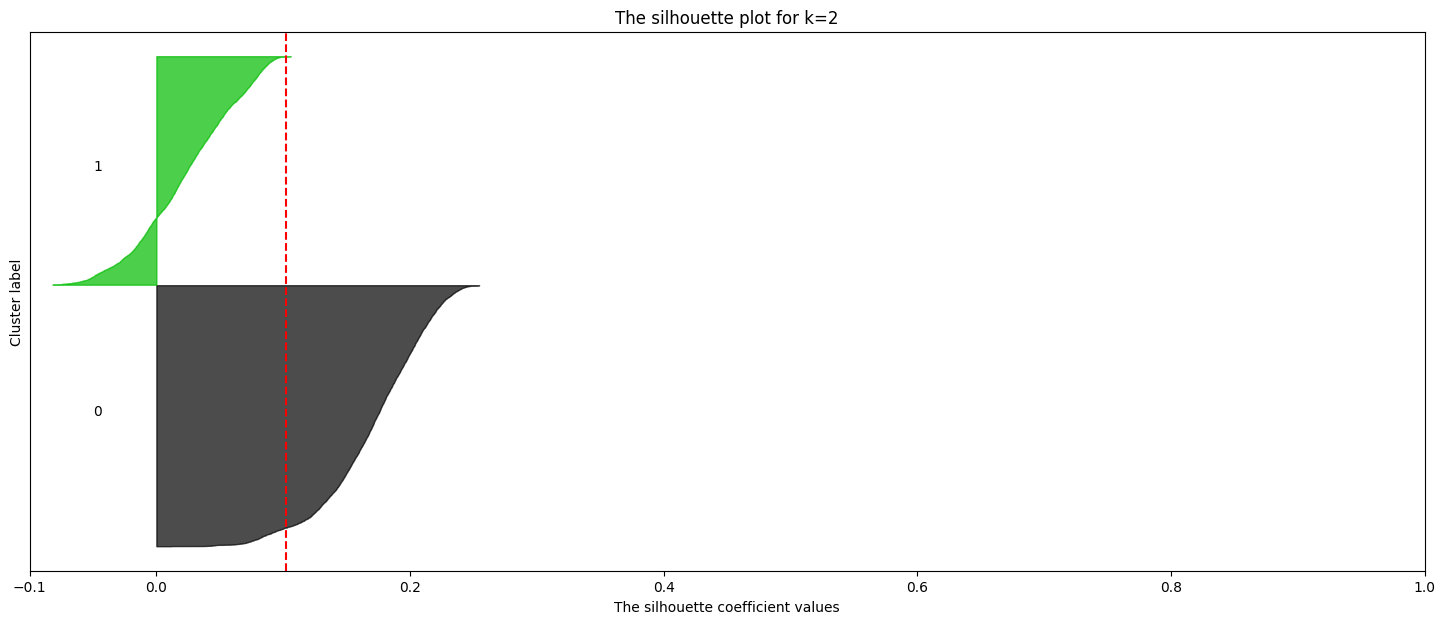

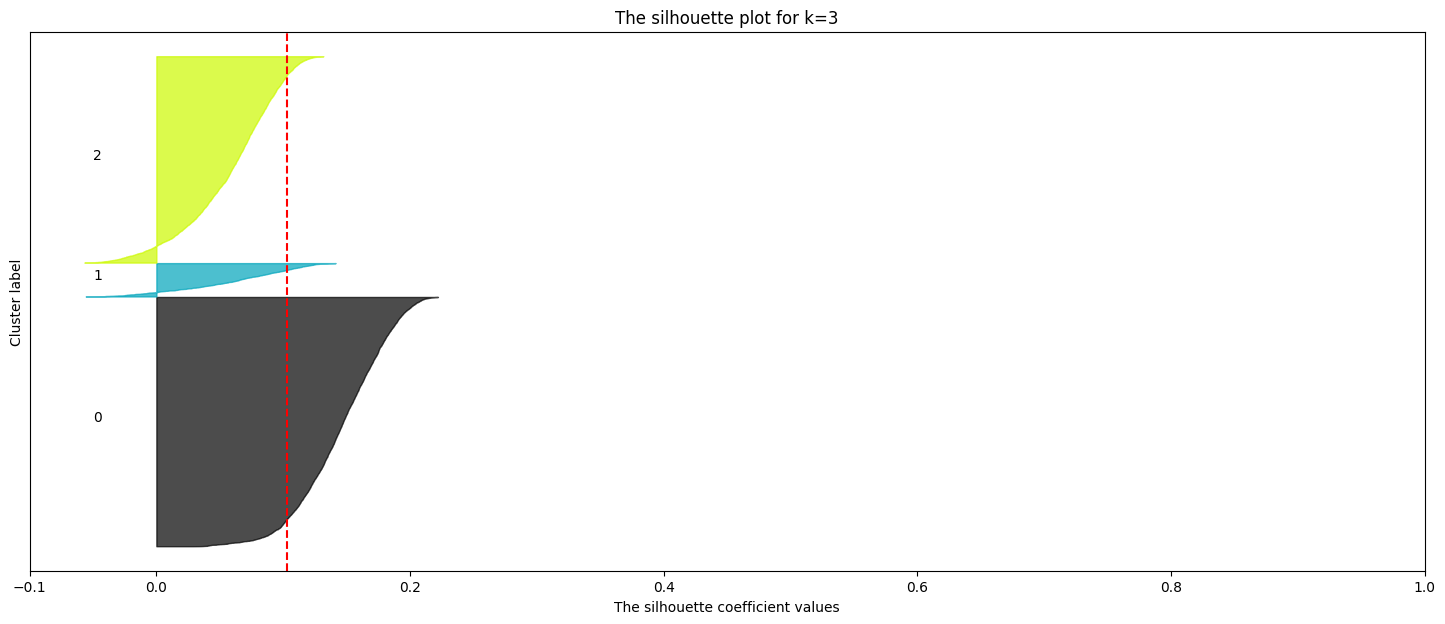

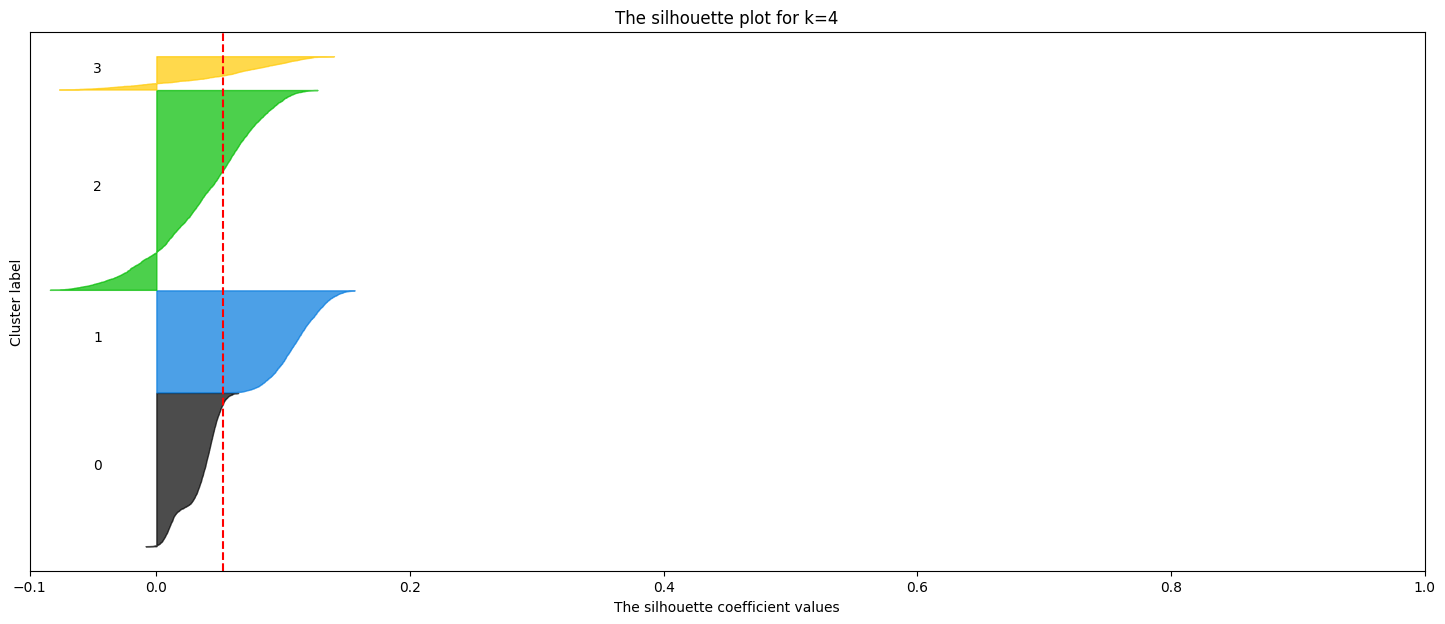

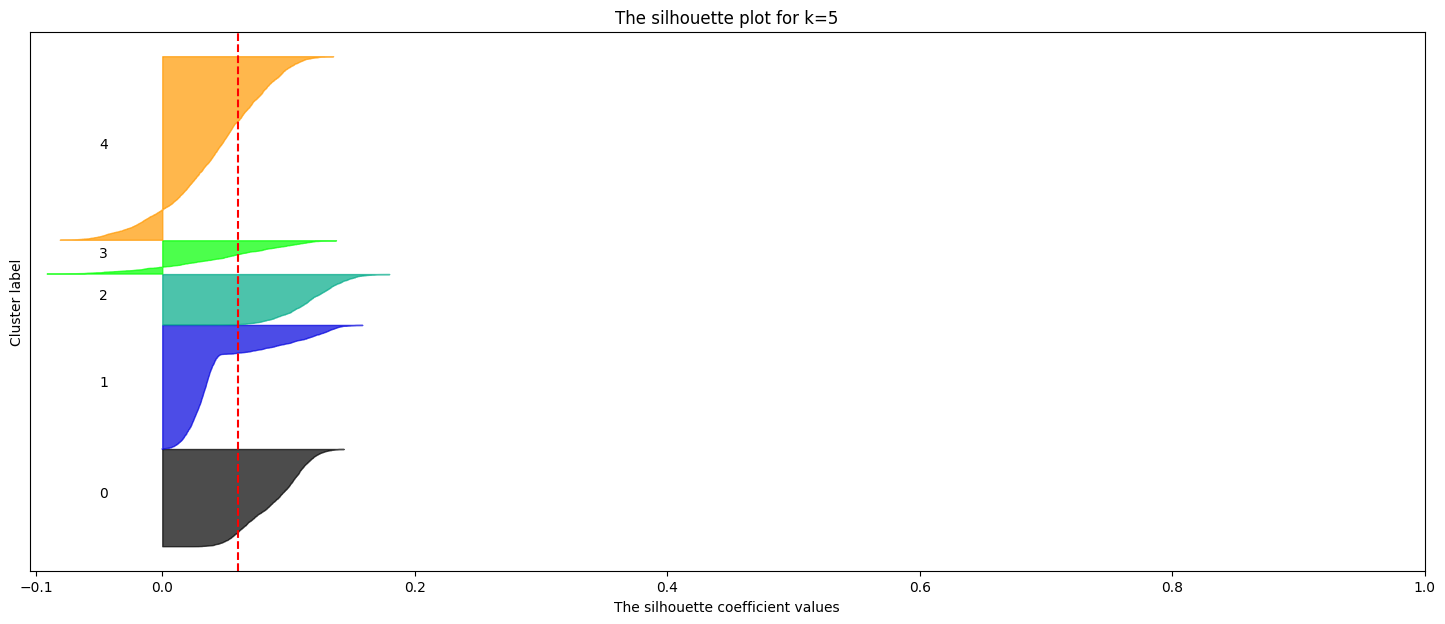

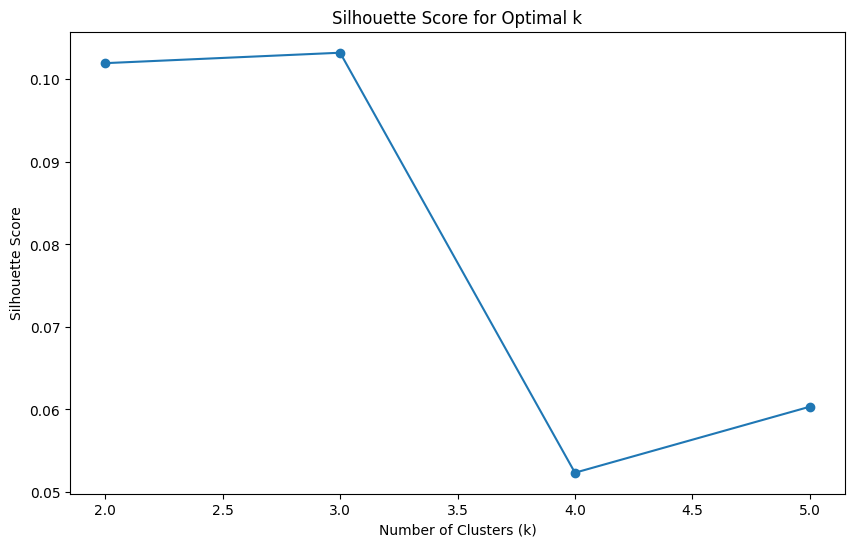

In [ ]:
# prompt: effettua la silhouette analysis per k=range(1,6)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
k_values = range(2, 6)  # Test k values from 2 to 5 (Silhouette score is not defined for k=1)

pca = PCA()
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(x_pca)

    cluster_labels = kmeans.predict(x_pca)
    silhouette_avg = silhouette_score(x_pca, cluster_labels) # Use data2 directly here
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(data2) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for k={k}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Find the best k based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best k based on Silhouette score: {best_k}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

<Axes: >

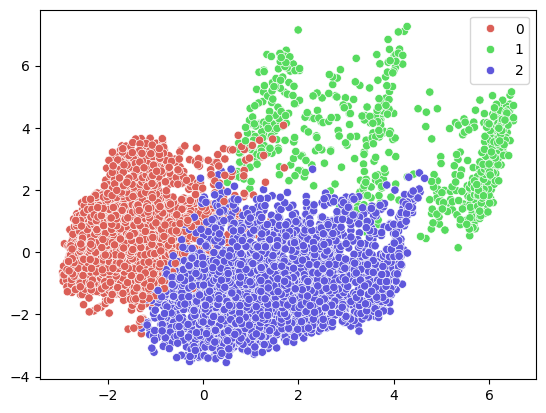

In [ ]:
import seaborn as sns

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(x_pca)

cluster_labels = kmeans.predict(x_pca)

sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue = cluster_labels, palette=sns.color_palette('hls', 3))

In [ ]:
data2['cluster'] = cluster_labels

In [ ]:
data['cluster'] = cluster_labels

In [ ]:
(np.cov(x_pca.T)*100).astype(np.int32)

array([[438,   0,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0,   0, 194, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [ ]:
x_pca[:,[0,1]].shape

(10127, 2)

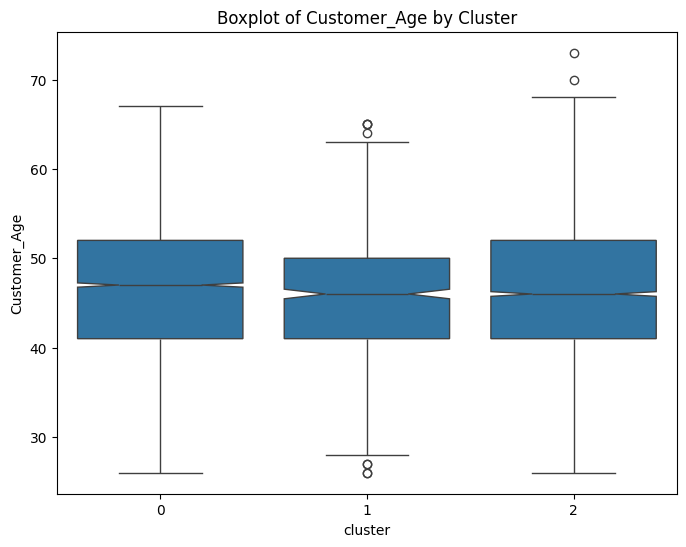

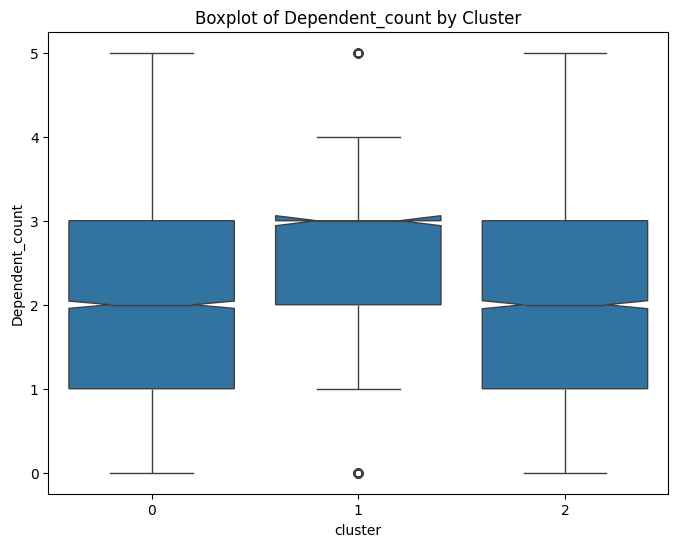

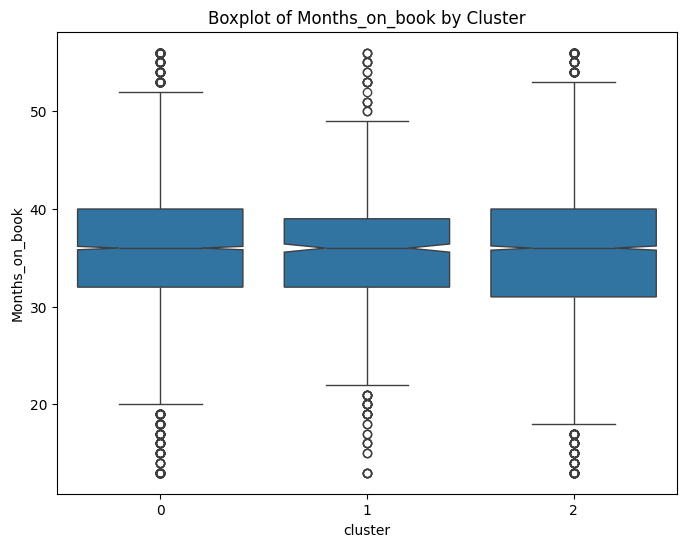

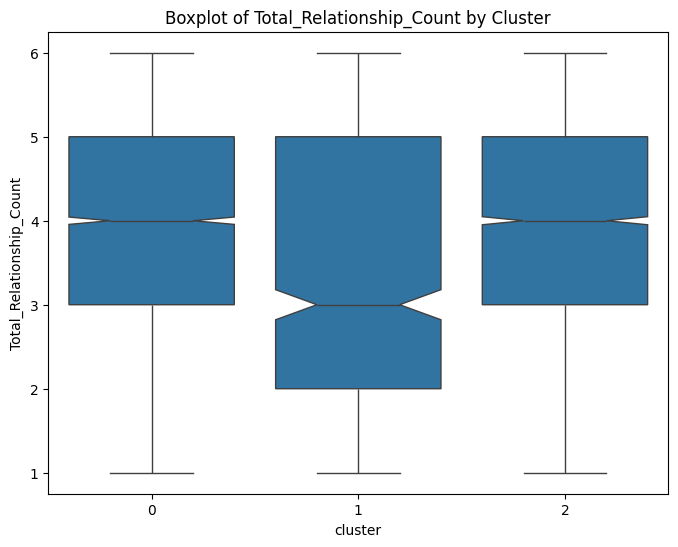

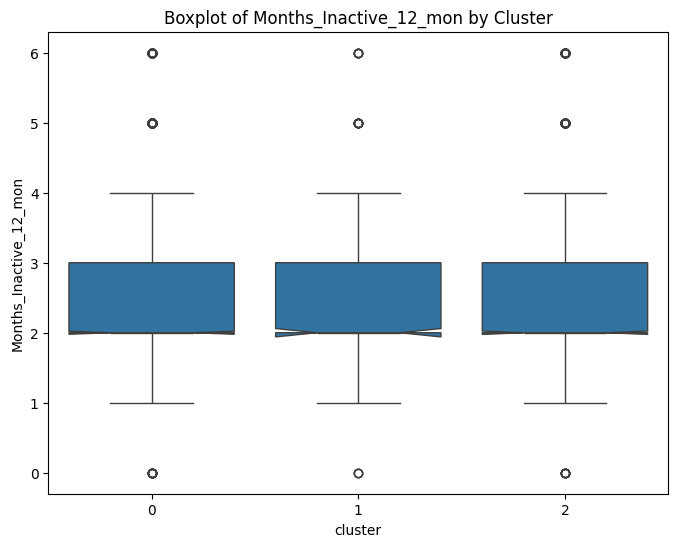

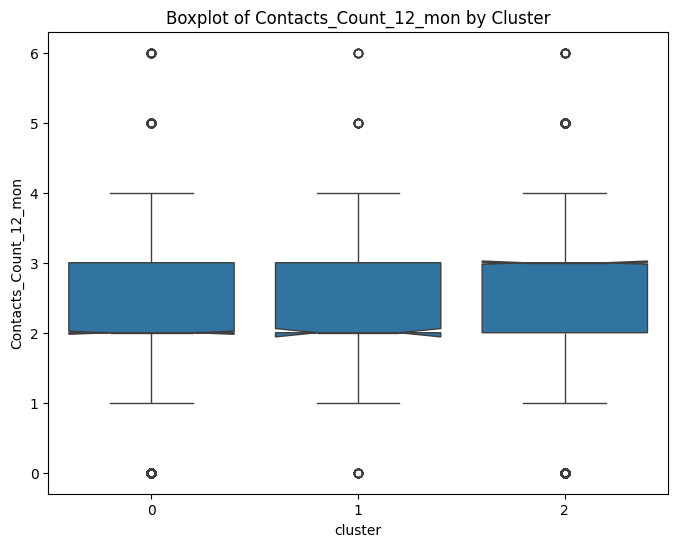

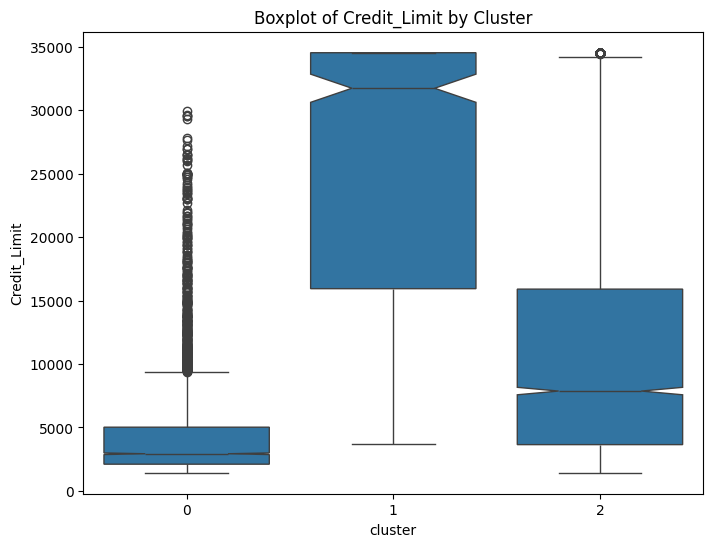

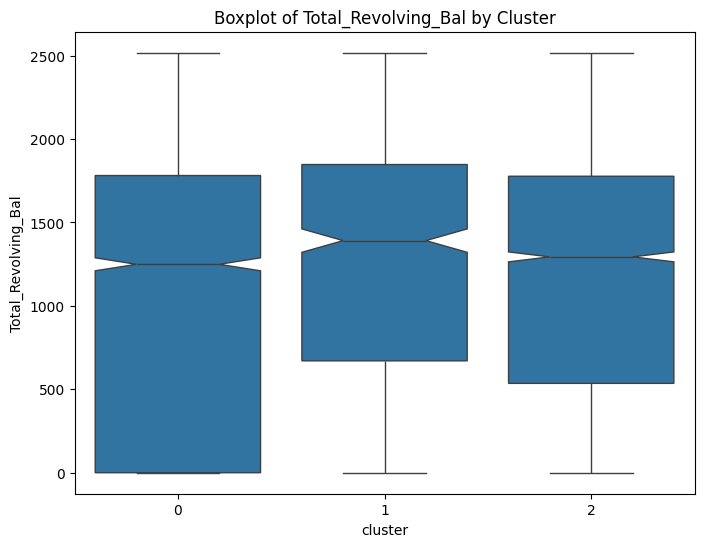

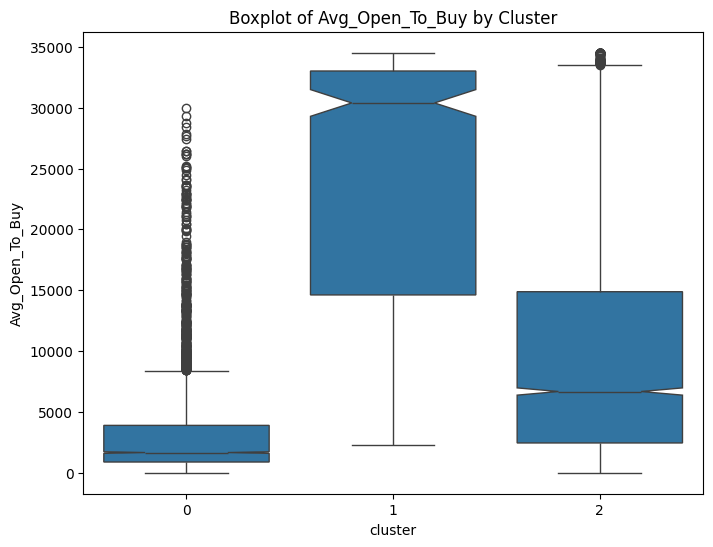

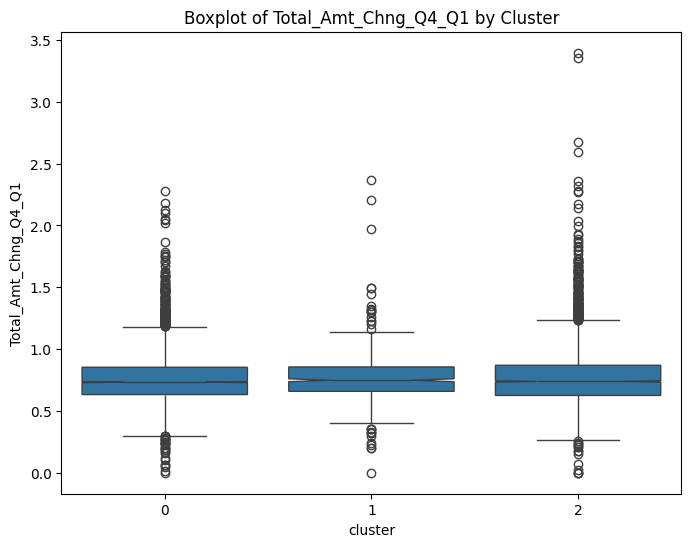

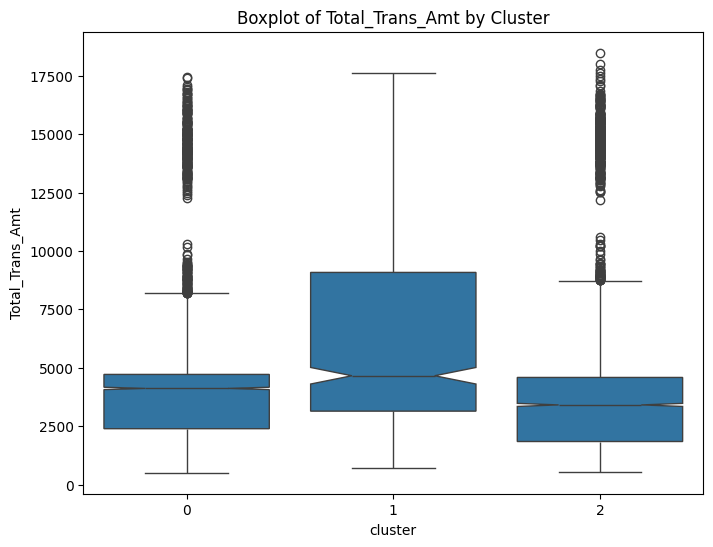

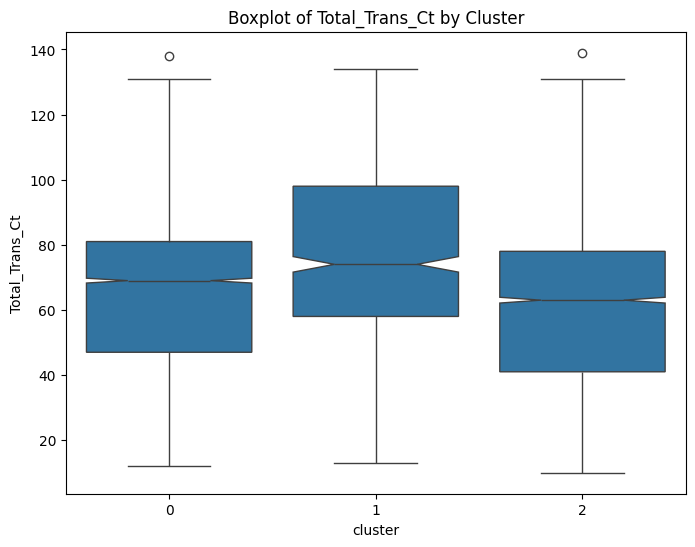

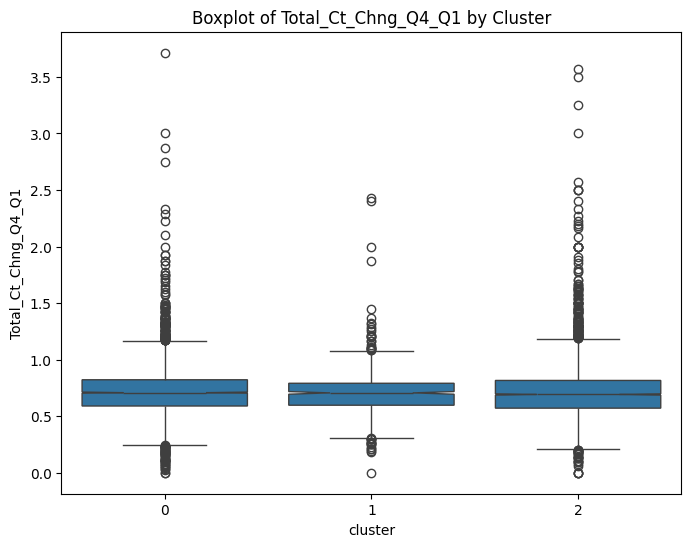

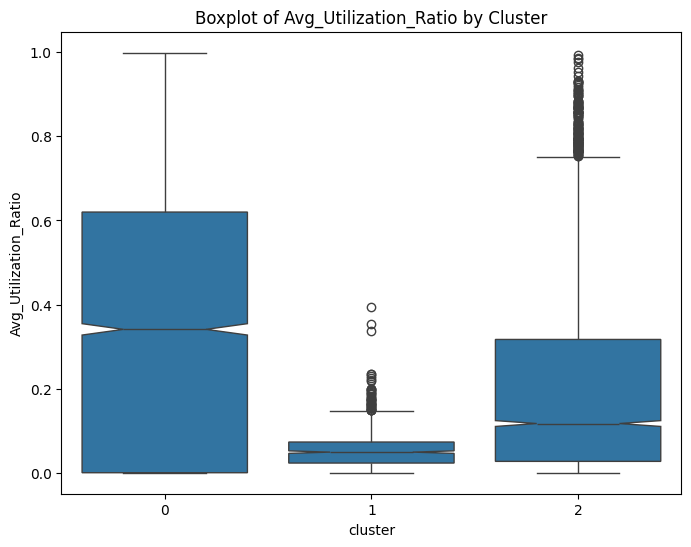

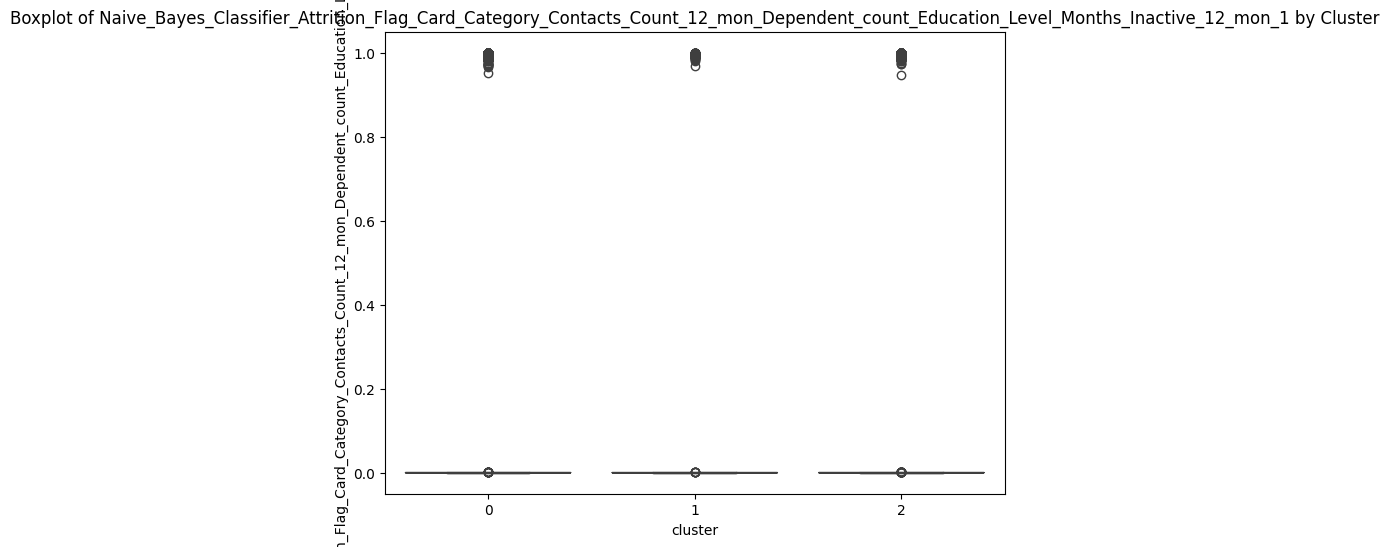

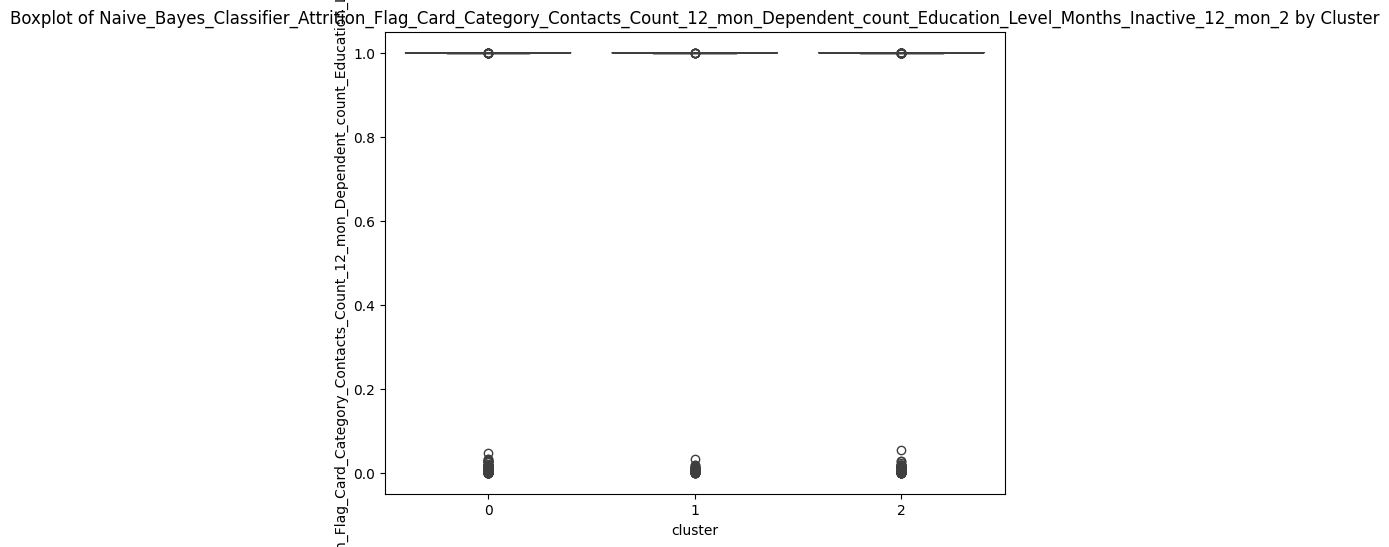

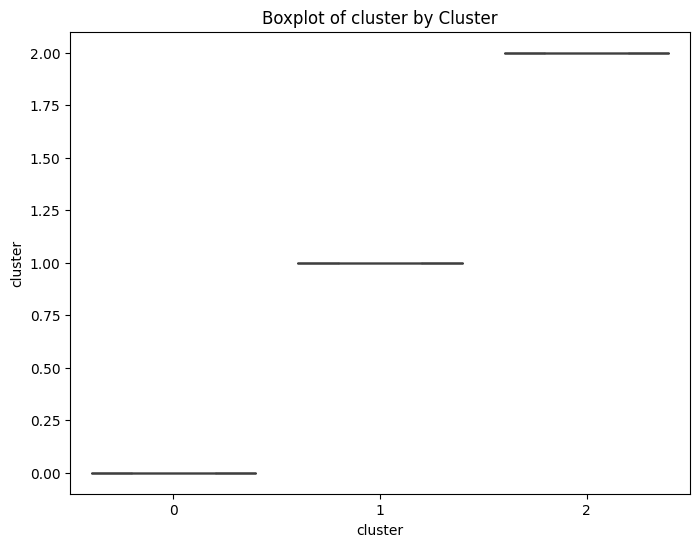

In [ ]:
# prompt: can you plot boxplots for numeric variables in data2 grouped by cluster?

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data2' and 'cluster_labels' are already defined from your previous code
# ... (your existing code to define data2 and cluster_labels) ...

# Select numeric columns for boxplots
numeric_cols = data.select_dtypes(include=['number']).columns

# Create boxplots for each numeric variable grouped by cluster
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='cluster', y=col, data=data, notch=True)
  plt.title(f'Boxplot of {col} by Cluster')
  plt.show()

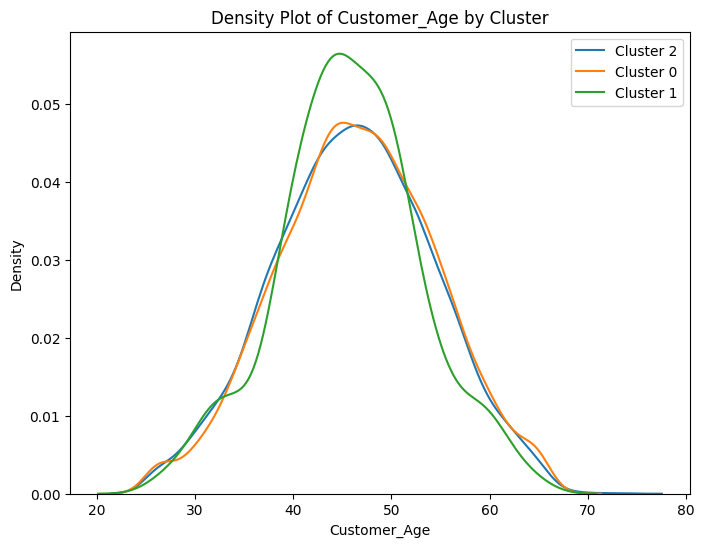

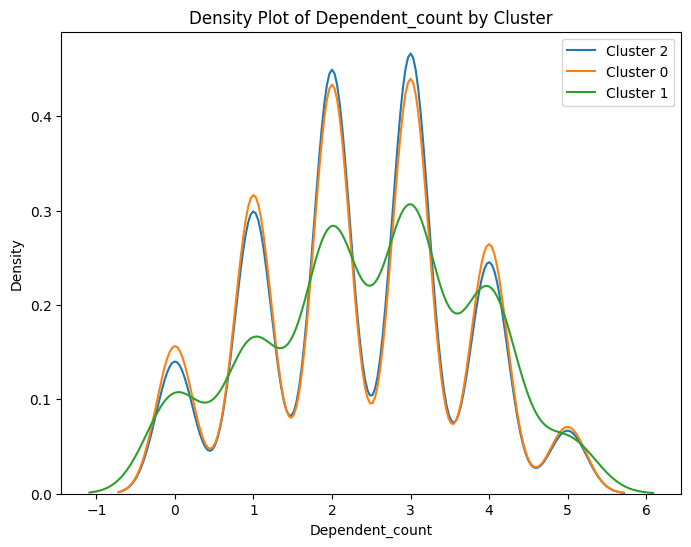

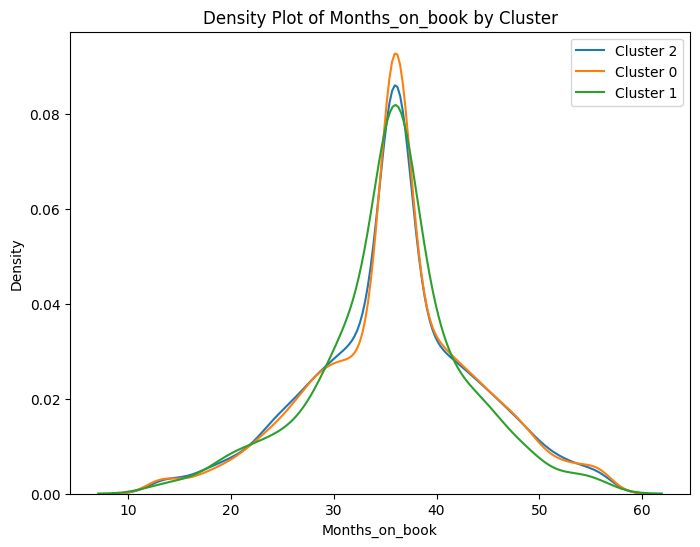

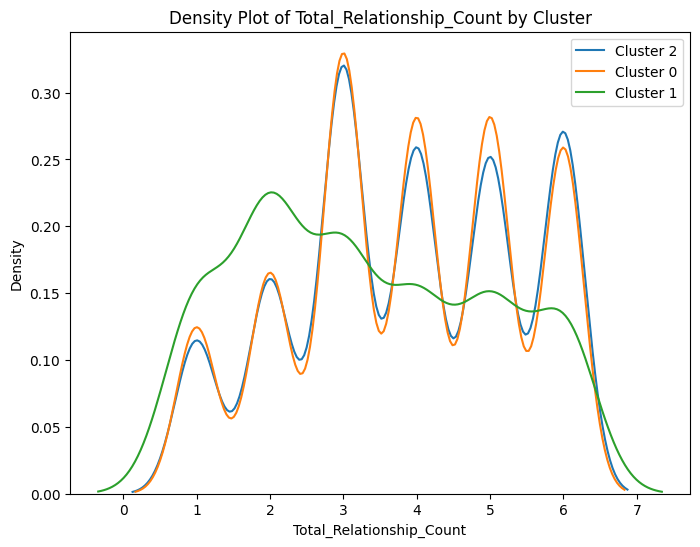

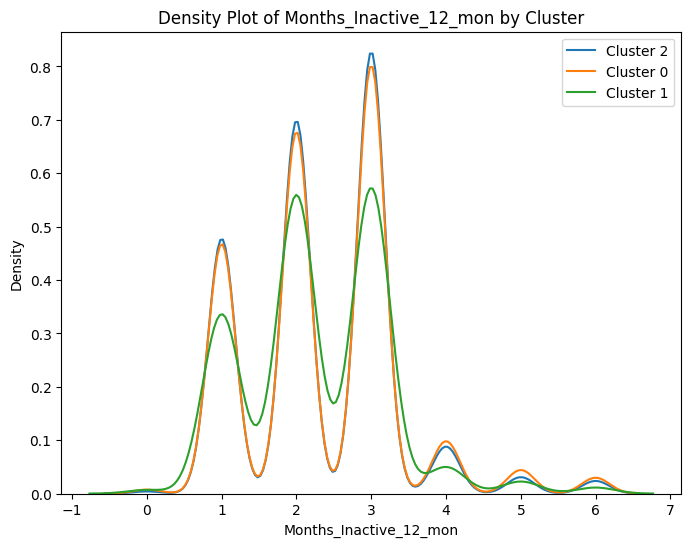

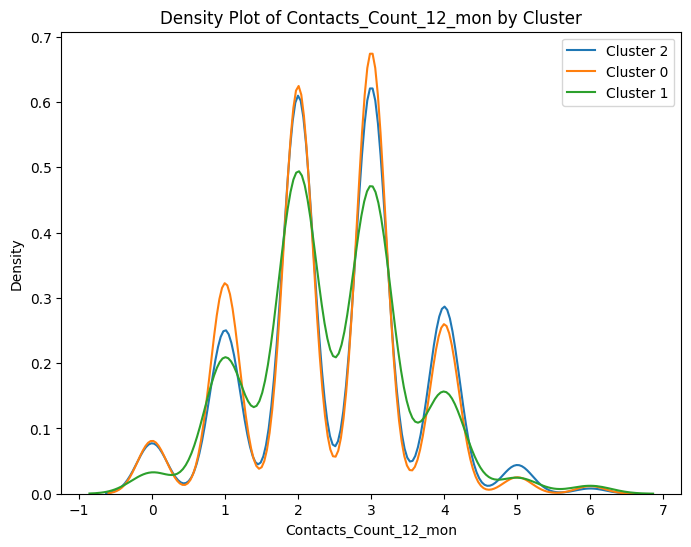

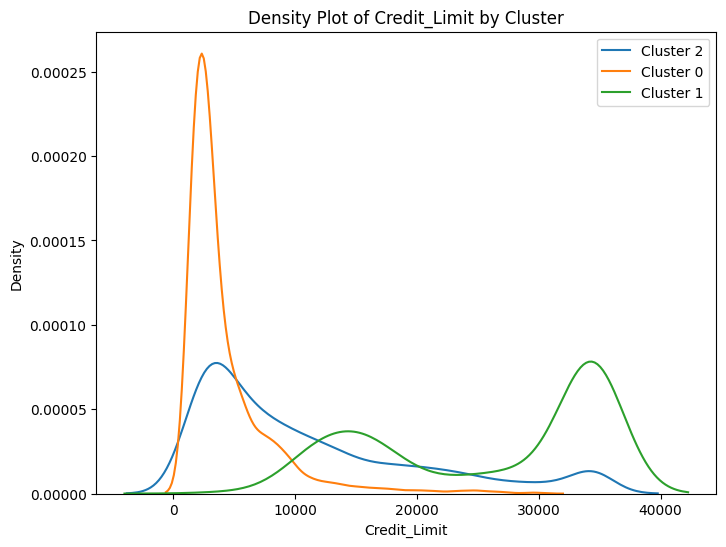

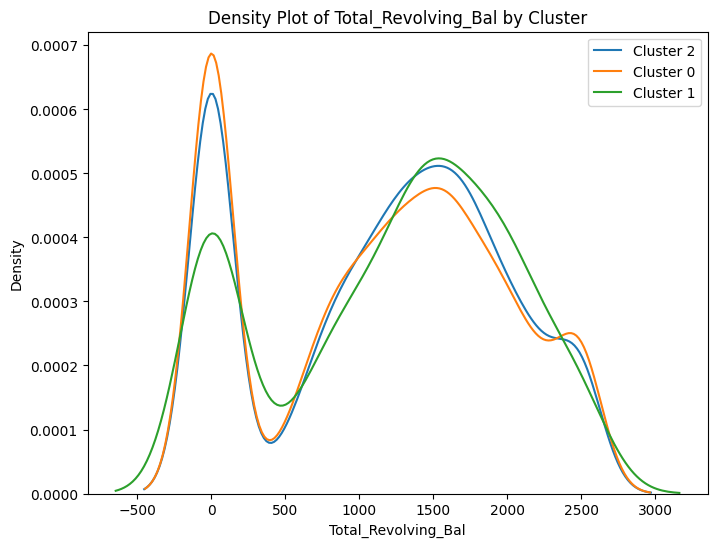

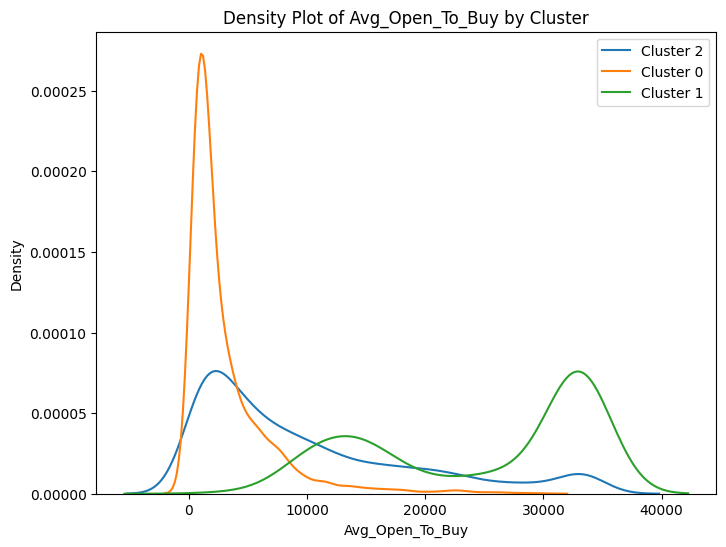

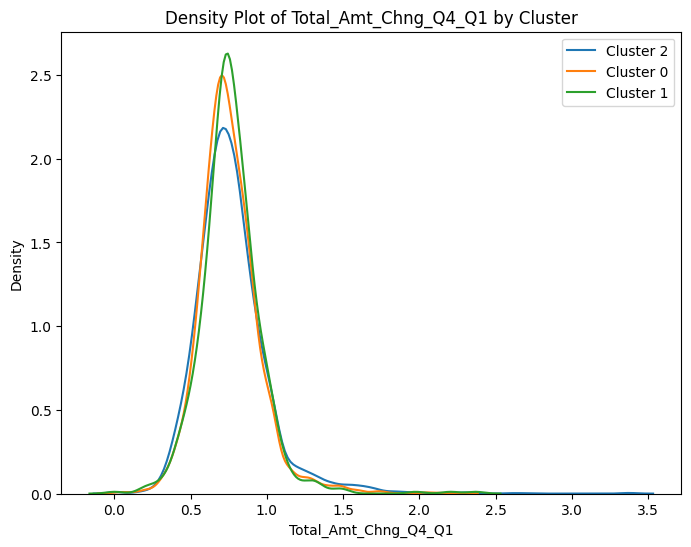

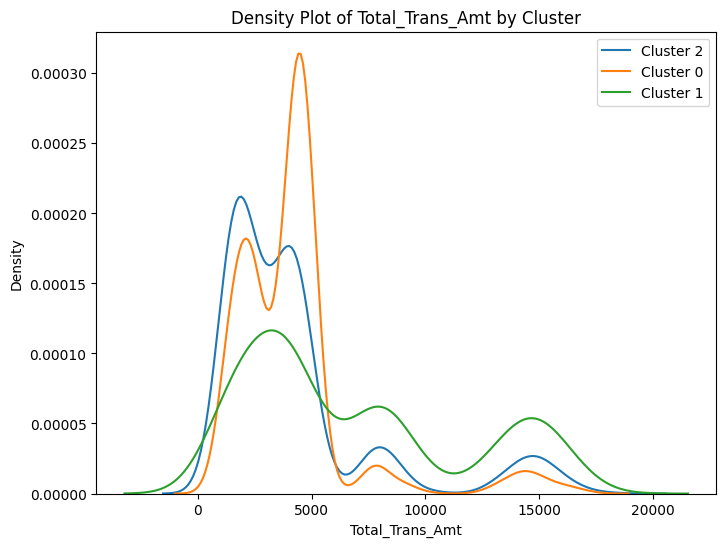

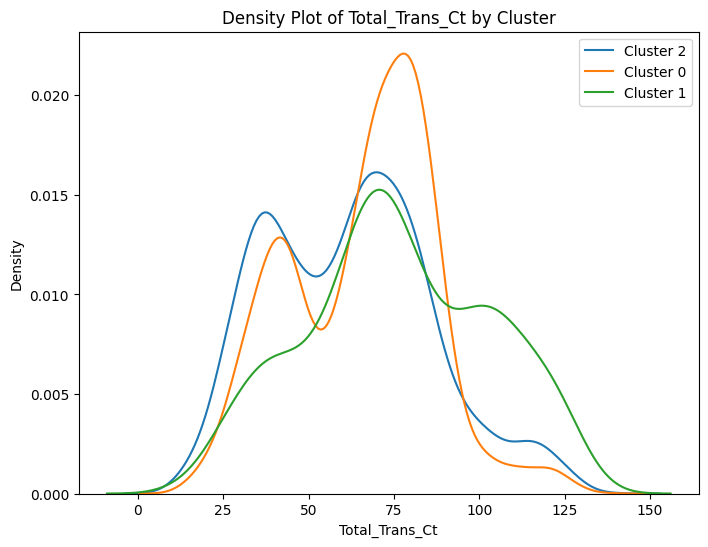

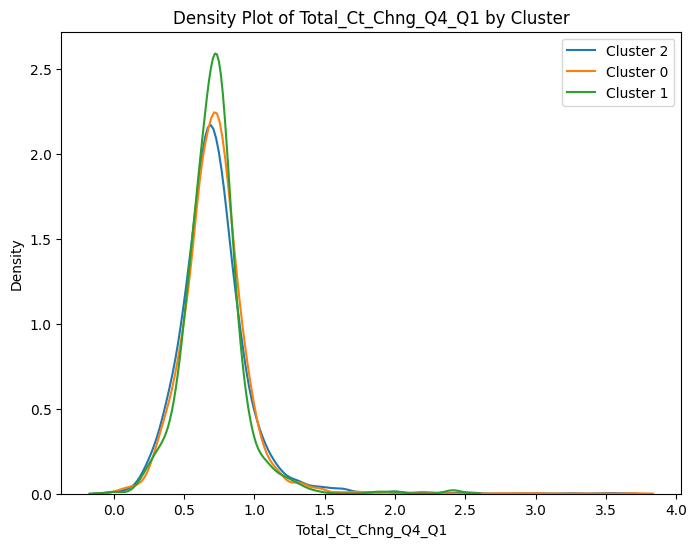

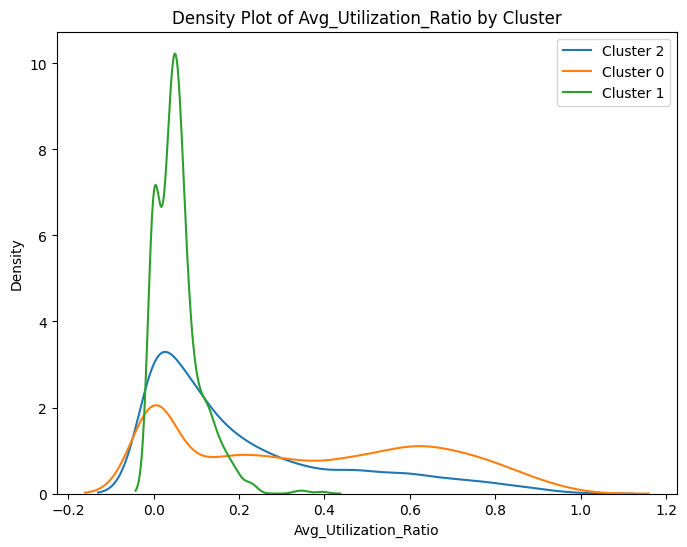

<ipython-input-100-ccc587c35145>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data2[data2['cluster'] == cluster][col], label=f'Cluster {cluster}')
<ipython-input-100-ccc587c35145>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data2[data2['cluster'] == cluster][col], label=f'Cluster {cluster}')
<ipython-input-100-ccc587c35145>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data2[data2['cluster'] == cluster][col], label=f'Cluster {cluster}')


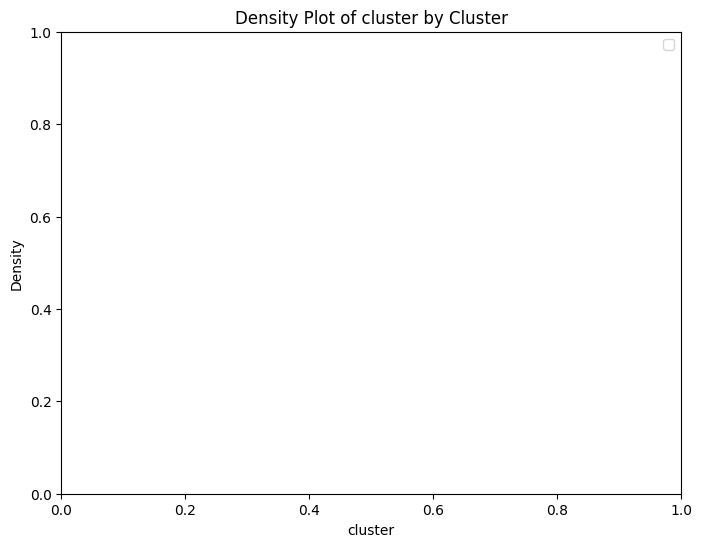

In [ ]:
# prompt: can you plot density estimates for numeric variables in data2 grouped by cluster?

# Assuming 'data2' and 'cluster_labels' are already defined from your previous code
# ... (your existing code to define data2 and cluster_labels) ...

# Select numeric columns for density plots
numeric_cols = data2.select_dtypes(include=['number']).columns

# Create density plots for each numeric variable grouped by cluster
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    for cluster in data2['cluster'].unique():
        sns.kdeplot(data2[data2['cluster'] == cluster][col], label=f'Cluster {cluster}')
    plt.title(f'Density Plot of {col} by Cluster')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()